# RFF-Hackathon1-EDA

**Exploratory Data Analysis (EDA)** is the activity of examining datasets to identify patterns, detect anomalies, explore relationships, and highlight trends. Performed early in a project, it employs statistical and graphical techniques in an attempt to better understand the data and guide further analysis.

## Load and explore the dataset using Pandas

In [1]:
import sys
!{sys.executable} -m pip install pandas numpy seaborn matplotlib


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [3]:
df = pd.read_csv('data/Spotify_Youtube.csv')

In [4]:
# how many rows/cols ?
df.shape

(20718, 28)

In [5]:
# what are the columns and their types?
df.dtypes

Unnamed: 0            int64
Artist               object
Url_spotify          object
Track                object
Album                object
Album_type           object
Uri                  object
Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Url_youtube          object
Title                object
Channel              object
Views               float64
Likes               float64
Comments            float64
Description          object
Licensed             object
official_video       object
Stream              float64
dtype: object

In [6]:
# first 5 rows
df[:5]

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [7]:
# how many unique artists?
unique_artists = df['Artist'].unique()
print(f'Unique artists {len(unique_artists)}')

Unique artists 2079


In [8]:
# how many unique songs?
unique_songs = (df['Artist'] + df['Track']).unique()
print(f'Unique songs {len(unique_songs)}')

Unique songs 20636


## Visualize trends and insights

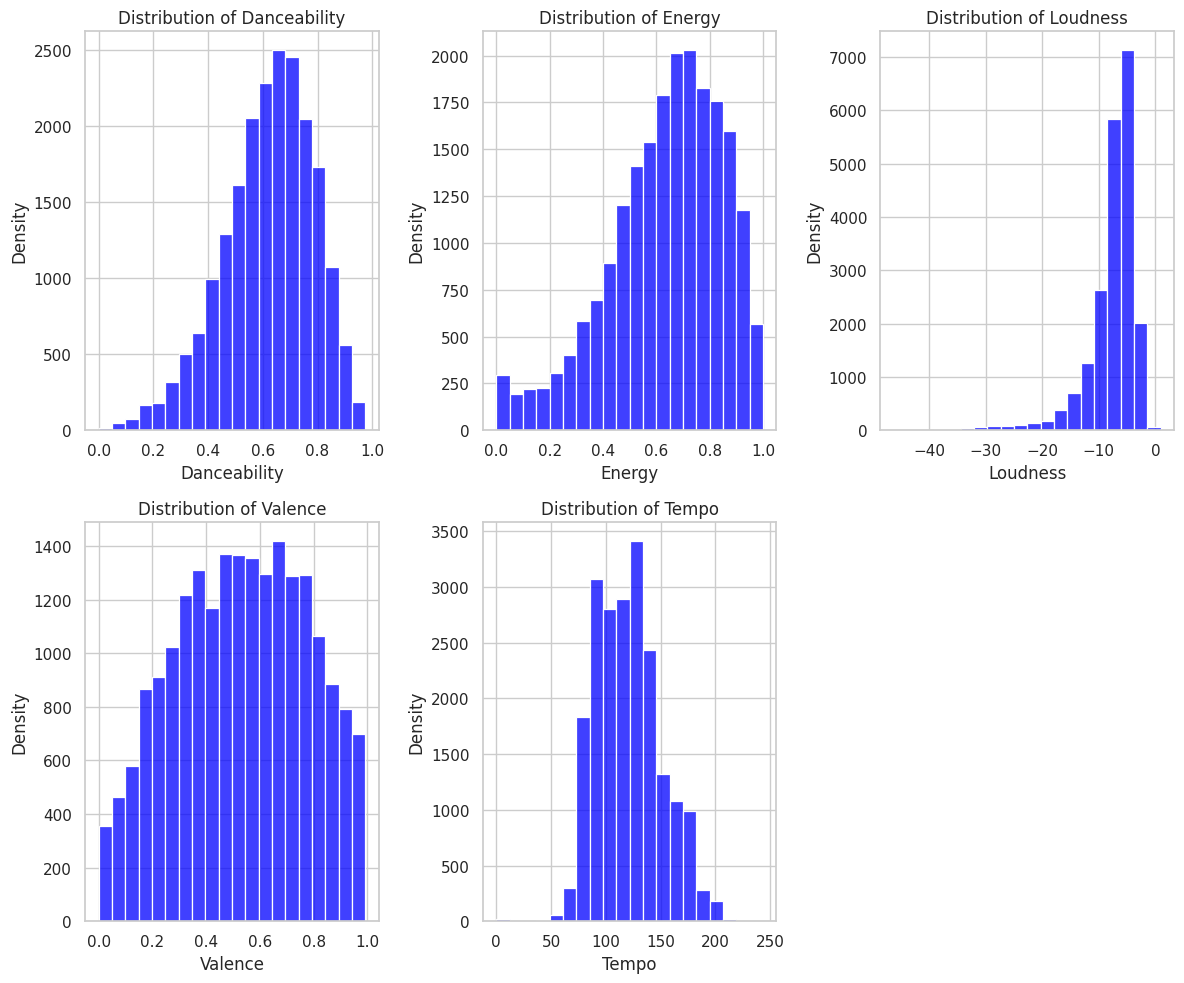

In [9]:
#2. Create visualizations to show the distribution of numerical features (danceability, energy, tempo, etc.)

sns.set(style='whitegrid')
plt.figure(figsize=(12, 10))

features = ['Danceability', 'Energy', 'Loudness', 'Valence', 'Tempo']
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i) 
    sns.histplot(df[feature], bins=20, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

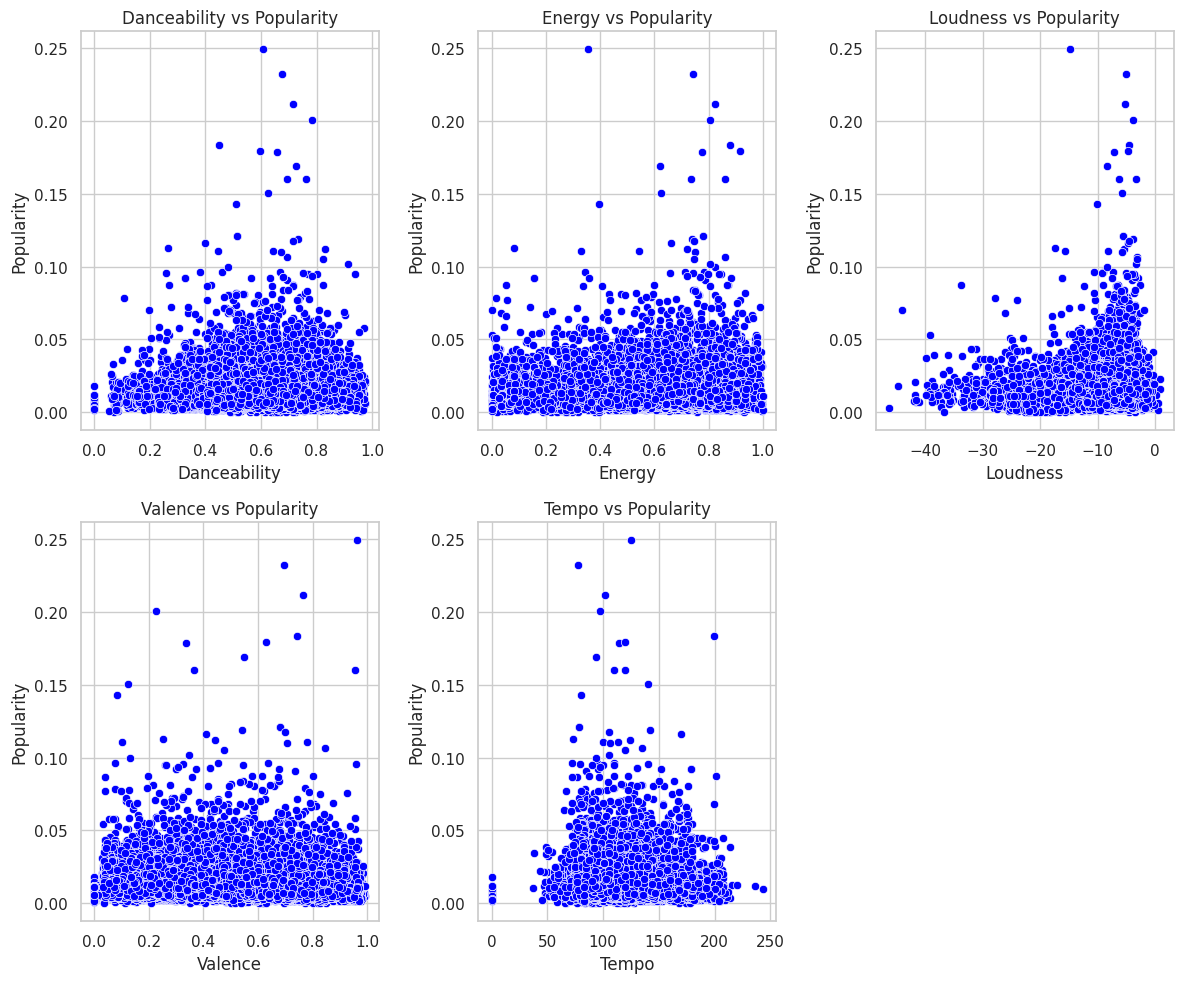

In [10]:
# We really have two data sets here - Spotify statistics and YouTube statistics.
# How does one guage the popularity of a song? For YouTube, we could say Likes/Views.
# But there is no equivalent Likes value for Spotify data to include in a calculation
# with Steams. So... let's just pretend all things are equal and use the YouTube
# metric

df['Popularity'] = df['Likes'] / df['Views']

plt.figure(figsize=(12, 10))

features = ['Danceability', 'Energy', 'Loudness', 'Valence', 'Tempo']
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[feature], y=df['Popularity'], color='blue')
    plt.title(f'{feature} vs Popularity')
    plt.xlabel(feature)
    plt.ylabel('Popularity')

plt.tight_layout()
plt.show()

In [11]:
#3. What are the top 10 most streamed songs on Spotify in the dataset?
df[['Track', 'Artist', 'Stream']].sort_values(by='Stream', ascending=False).head(10)

,Track,Artist,Stream
15250,Blinding Lights,The Weeknd,3.386520e+09
12452,Shape of You,Ed Sheeran,3.362005e+09
19186,Someone You Loved,Lewis Capaldi,2.634013e+09
17937,rockstar (feat. 21 Savage),Post Malone,2.594927e+09
17445,Sunflower - Spider-Man: Into the Spider-Verse,Swae Lee,2.538330e+09
17938,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,2.538330e+09
13503,One Dance,Drake,2.522432e+09
16099,Closer,The Chainsmokers,2.456205e+09
16028,Closer,Halsey,2.456205e+09
14030,Believer,Imagine Dragons,2.369272e+09


In [12]:
#4. What are the top 10 most viewed music videos on YouTube?
df[['Track', 'Artist', 'Views']].sort_values(by='Views', ascending=False).head(10)

,Track,Artist,Views
1147,Despacito,Luis Fonsi,8.079649e+09
365,Despacito,Daddy Yankee,8.079647e+09
12452,Shape of You,Ed Sheeran,5.908398e+09
14580,See You Again (feat. Charlie Puth),Charlie Puth,5.773798e+09
12469,See You Again (feat. Charlie Puth),Wiz Khalifa,5.773797e+09
20303,Wheels on the Bus,CoComelon,4.898831e+09
10686,Uptown Funk (feat. Bruno Mars),Mark Ronson,4.821016e+09
8937,Gangnam Style (강남스타일),PSY,4.679767e+09
9569,Sugar,Maroon 5,3.817733e+09
13032,Roar,Katy Perry,3.725749e+09


## Reflection

#5. Is there a correlation any noteable correlation between features?

See scatter plots. It appears higher energy and dancability corresponds to popularity (sum of views and streams), but that isn't necessarily a fast tempo. People also seem to like loud music.

#6. There are 28 features, if you were to try and predict the perfect recipe for a hit song, which features would you use and why?

Well, I'd obviously have to use Energy, Dancability, Loudness, etc. since that's given data. But we can also derive values (for example, popularity being sum of Views and Streams, or alternatively Likes/Views if only using YouTube data). It might also be worth attempting to map popularity by artist - We find ourselves in a highly processed and marekted world. The music speaks for itself like with Mozart, Bach, and Beethoven. Nowadays personality matters and who is singing may affect popularity. If we were looking at a scientific data set, statistics on collected data might yield everything we're looking for, but for cultural data we often need to look beyond the data and understand the context in which it exists.


## Data Cleaning

In [13]:
#1. How many missing values are there in each column?

# drop Popularity from earlier ...
df.drop('Popularity', axis=1, inplace=True)

rows = df.shape[0]

stats = []
for feature in df.columns:
    non_empty_count = df[feature].count()
    empty_count = rows - non_empty_count
    stats.append([feature, non_empty_count, empty_count])

pd.DataFrame(stats, columns=['Feature', 'Non-empty', 'Empty'])


,Feature,Non-empty,Empty
0,Unnamed: 0,20718,0
1,Artist,20718,0
2,Url_spotify,20718,0
3,Track,20718,0
4,Album,20718,0
5,Album_type,20718,0
6,Uri,20718,0
7,Danceability,20716,2
8,Energy,20716,2
9,Key,20716,2


2. What columns need cleaning? (e.g., formatting issues, inconsistent data)

Because it's been my experience you can try to get things clean ahead of time, but there's always gotchas, I approach clean up separate from EDA. So what columns need cleaning? The columns we're going to use for whatever our task is. I know this question is probably asking for specifics, but I haven't looked at the data at this granularity yet. I'm still thinking in terms of features and general trends.

Some questions that do come to mind are:

Are all artists listing group? May need to ensure track+arist yields different performances by different artists but not same as a result of bad data (ex in cases of "featuring")

It still bothers me we only have streams for spotify, but views and likes for youtube. Does that mean likes is a meaningless feature? Presumably they're more costly to fake with bots than simple views though - I dunno.  What about comments and views as a measure of interaction for popularity - There are still bot farms, but the more features we include in popularity make it more expensive and difficult for non-organic growth to influence results.

I'm sure there's some cool way they calculated dancability, liveness, valiency, etc. But we don't understand what those numbers really represent without the calculation details. Would we drop them, spot check them?

In [14]:
# 3. Create one new feature from existing data (e.g., views_per_like = views/likes)

df['Combined_Consumption'] = df['Stream'] + df['Views']
df[['Track', 'Artist', 'Combined_Consumption']].sort_values(by='Combined_Consumption', ascending=False).head(10)

# wow, people really lke Despacito :-/

,Track,Artist,Combined_Consumption
1147,Despacito,Luis Fonsi,9.586248e+09
365,Despacito,Daddy Yankee,9.586245e+09
12452,Shape of You,Ed Sheeran,9.270404e+09
14580,See You Again (feat. Charlie Puth),Charlie Puth,7.295053e+09
12469,See You Again (feat. Charlie Puth),Wiz Khalifa,7.295052e+09
10686,Uptown Funk (feat. Bruno Mars),Mark Ronson,6.474836e+09
12455,Thinking out Loud,Ed Sheeran,5.701490e+09
12449,Perfect,Ed Sheeran,5.673776e+09
13040,Counting Stars,OneRepublic,5.526930e+09
14074,Sorry,Justin Bieber,5.368065e+09
